*Movies x TV Shows*

*Ranking de Países*

Releases along the years

Duration

Month Adedd

How old are the TV shows?

Movie Rating Analysis

Genres Wordlcoud

Tv Shows - Numbers of seasons

In [211]:
# importando pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [2]:
# importando arquivo csv no Pandas
df = pd.read_csv(r"D:\Meu Drive\Colab Notebooks\Projetos\Netflix\netflix_titles.csv")

In [3]:
# visualizando primeiras entradas do dataframe
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# visualizando nome das colunas e quantidade de dados
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

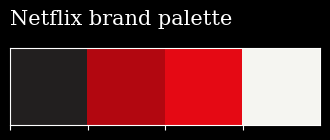

In [133]:
netflix_colors = ['#221f1f', '#b20710', '#e50914','#f5f5f1']
sns.palplot(netflix_colors)

plt.title("Netflix brand palette", loc='left', fontfamily='serif', fontsize=15, y=1.2)

plt.show()

In [109]:
df['type'].value_counts('Movie')*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

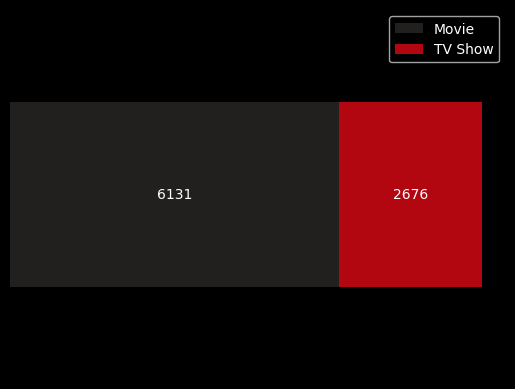

In [132]:
types = df.assign(dummy=1).groupby(['dummy','type']).size().to_frame().unstack()

ax = types.plot.barh(stacked=True, legend=True, grid=False, color=netflix_colors)

ax.bar_label(ax.containers[0], label_type='center', color='white')
ax.bar_label(ax.containers[1], label_type='center', color='white')

plt.axis('off')
plt.legend(['Movie', 'TV Show'])

plt.show()

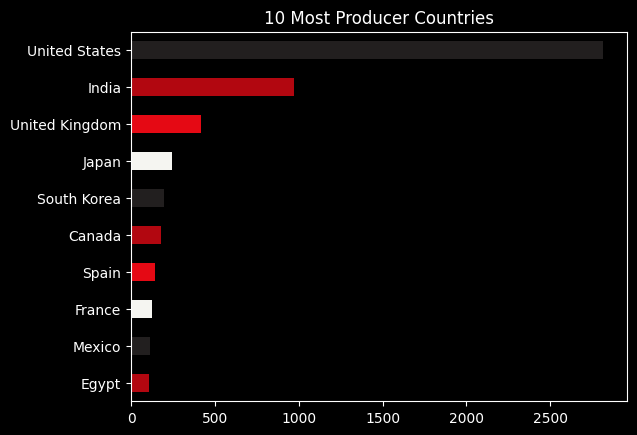

In [131]:
countries = df['country'].value_counts()[:10]

ax = countries.plot.barh(color=netflix_colors)

ax.set_title('10 Most Producer Countries')
ax.invert_yaxis()

In [ ]:
movies = df[(df.type == 'Movie')]
tv_shows = df[(df.type == 'TV Show')]

movies['duration'][0]

movies['duration'].apply(lambda x: float(x.replace(' min', '')))

# tratar dados ausentes para conseguir converter os valores em float

# plt.hist('duration', data=movies)

In [217]:
movies.isnull().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

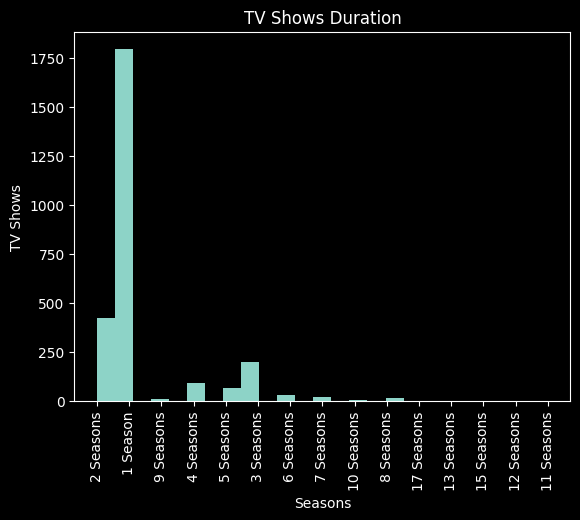

In [241]:
tv_shows['duration'].apply(lambda x: re.sub('[^0-9]', '', x))

plt.hist('duration', data=tv_shows, bins=25)
plt.title('TV Shows Duration')
plt.ylabel('TV Shows')
plt.xlabel('Seasons')
plt.xticks(rotation='vertical')

plt.show()
